In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [331]:
df=pd.read_csv("data/diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [195]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [196]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [197]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


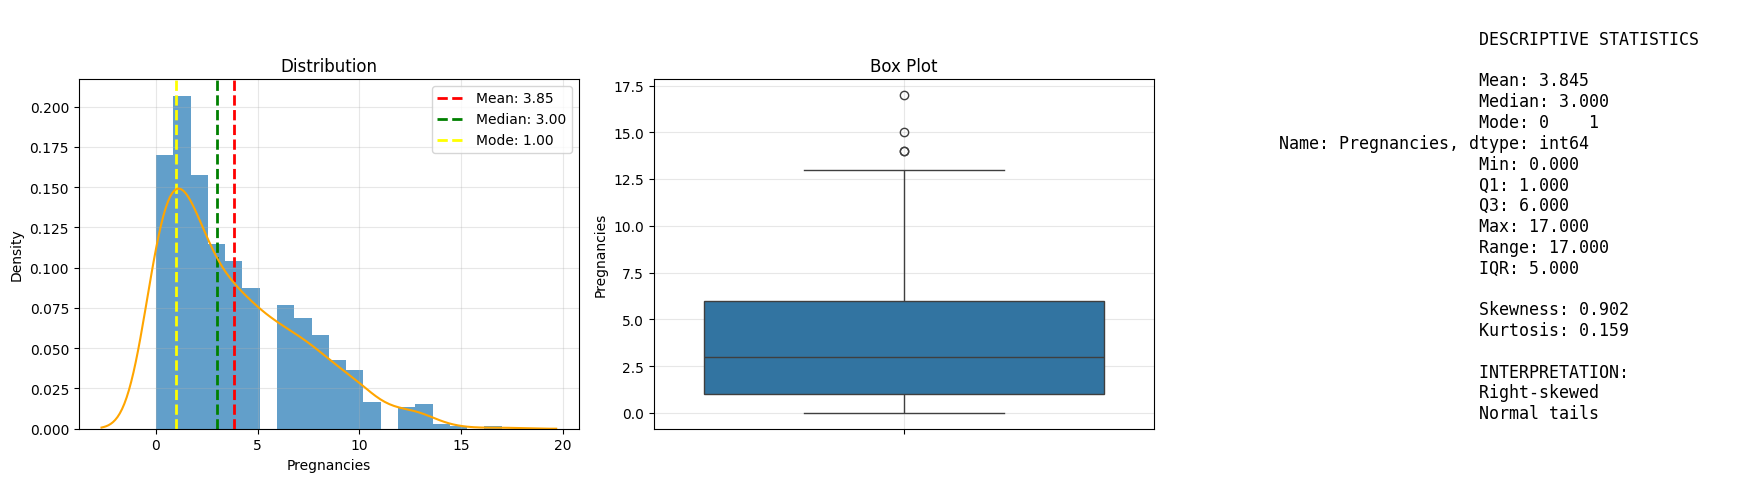

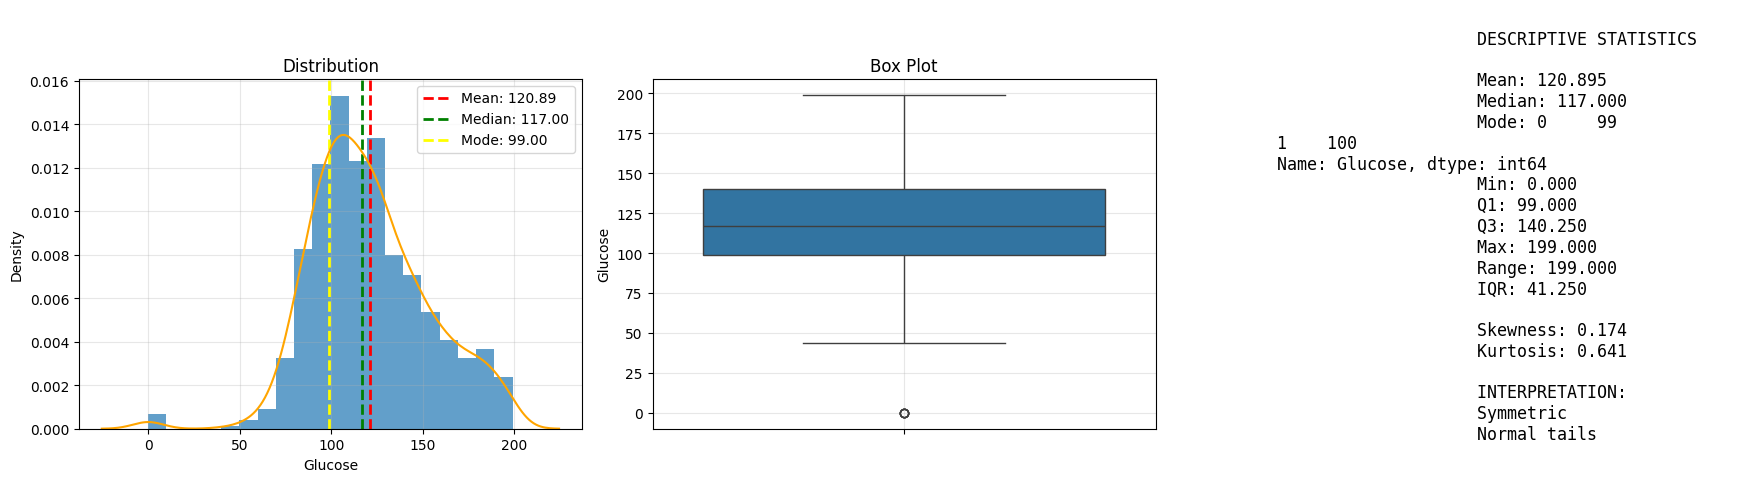

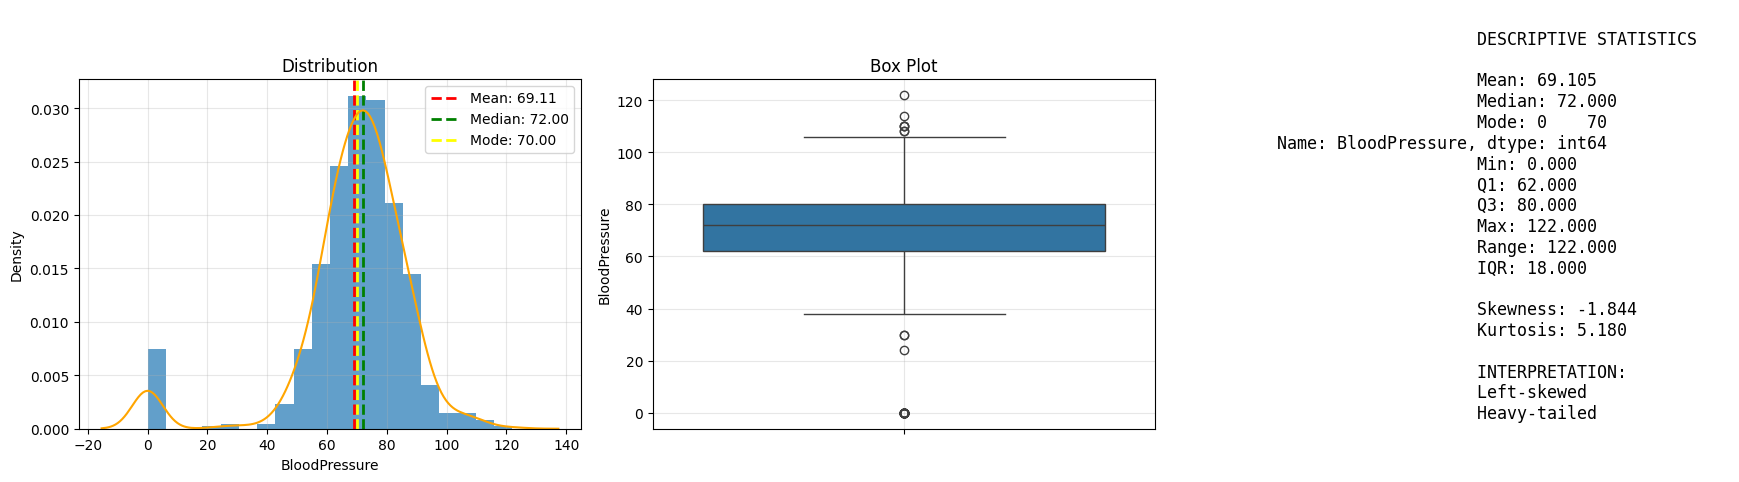

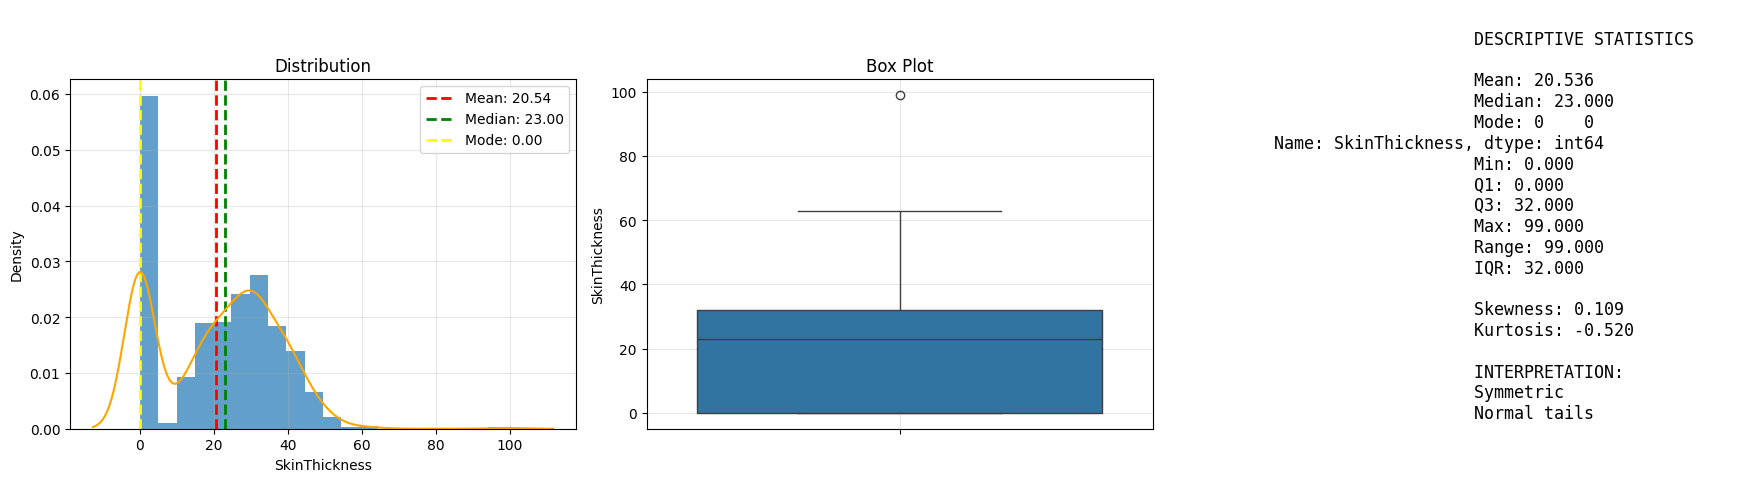

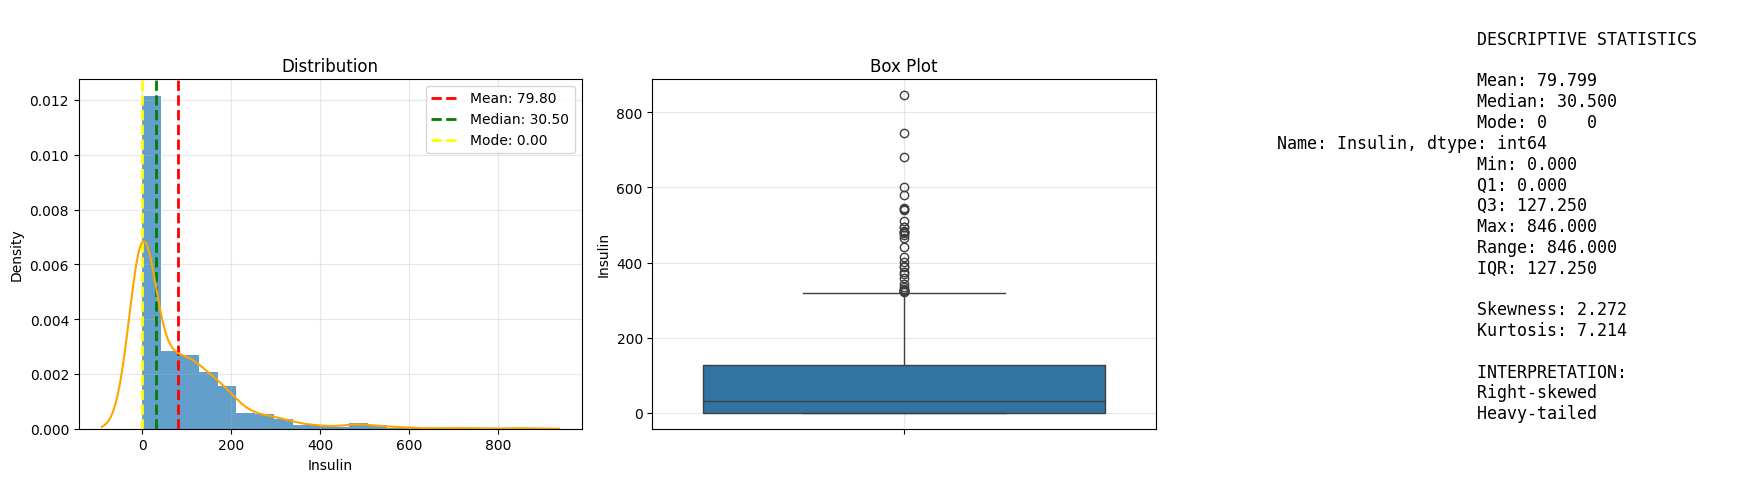

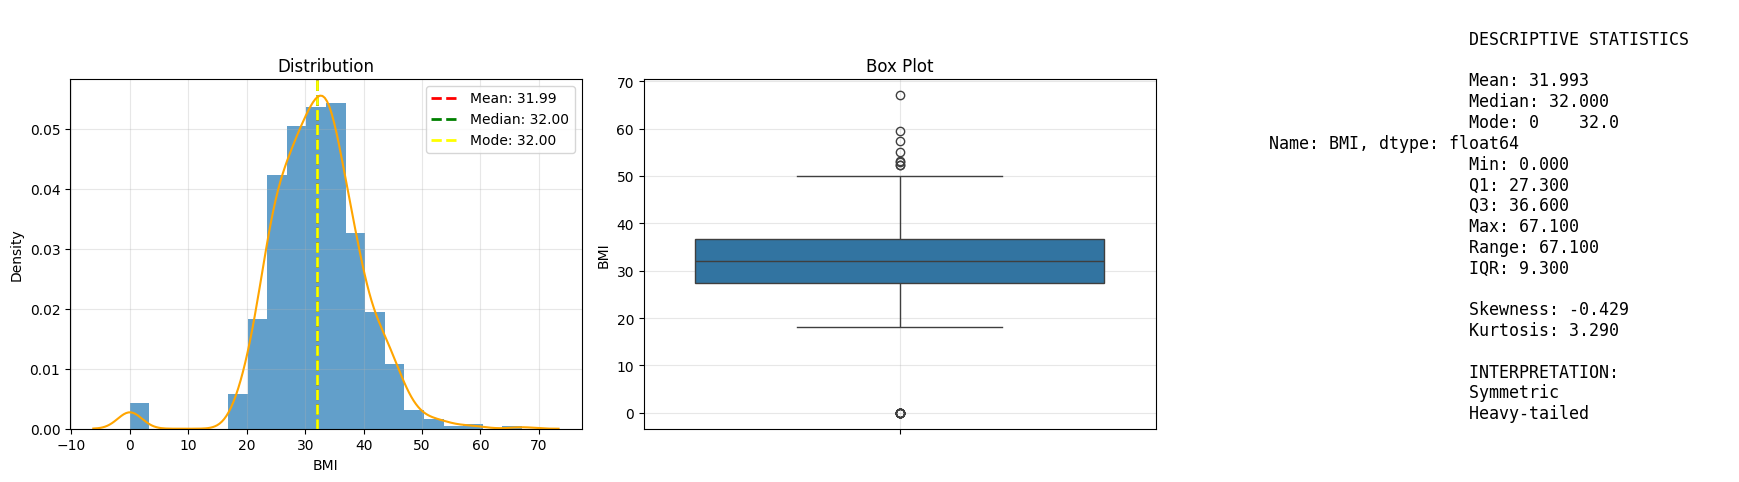

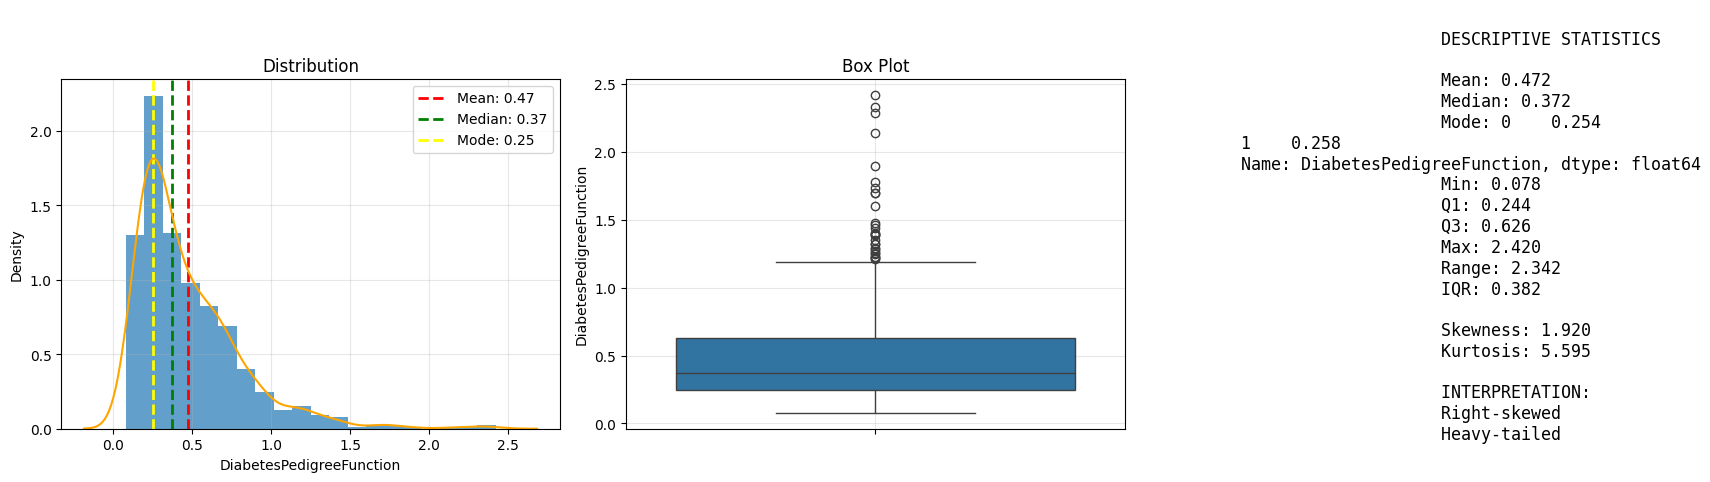

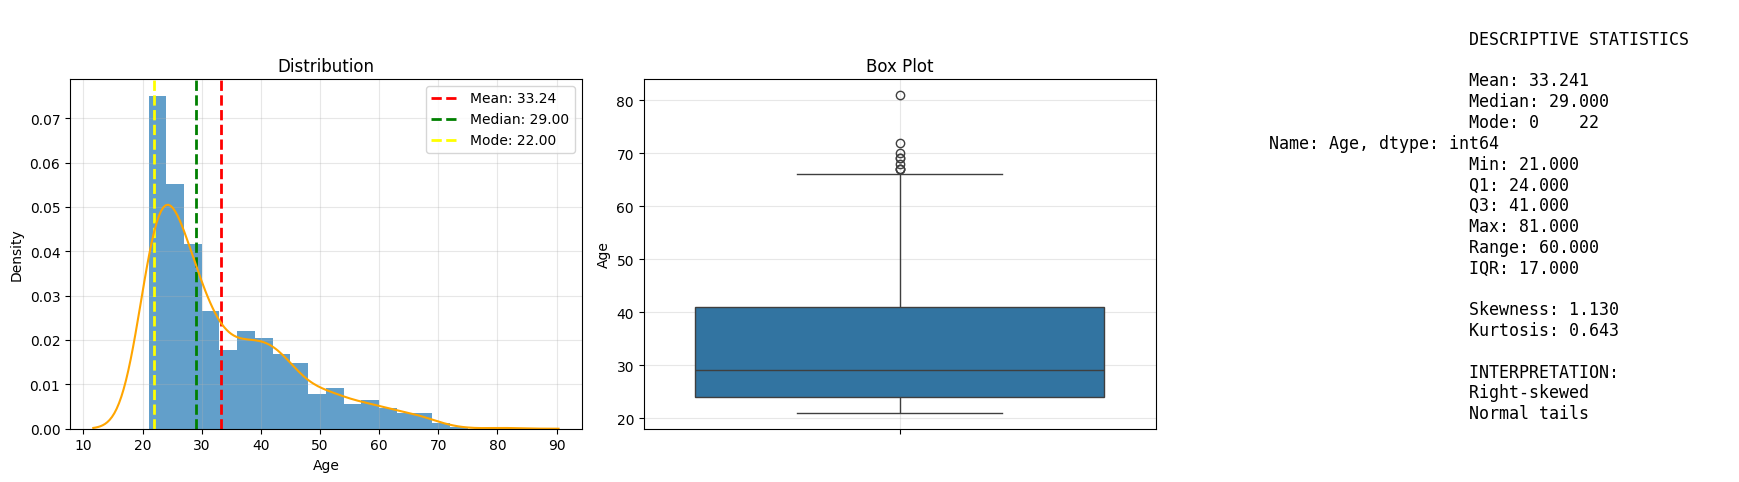

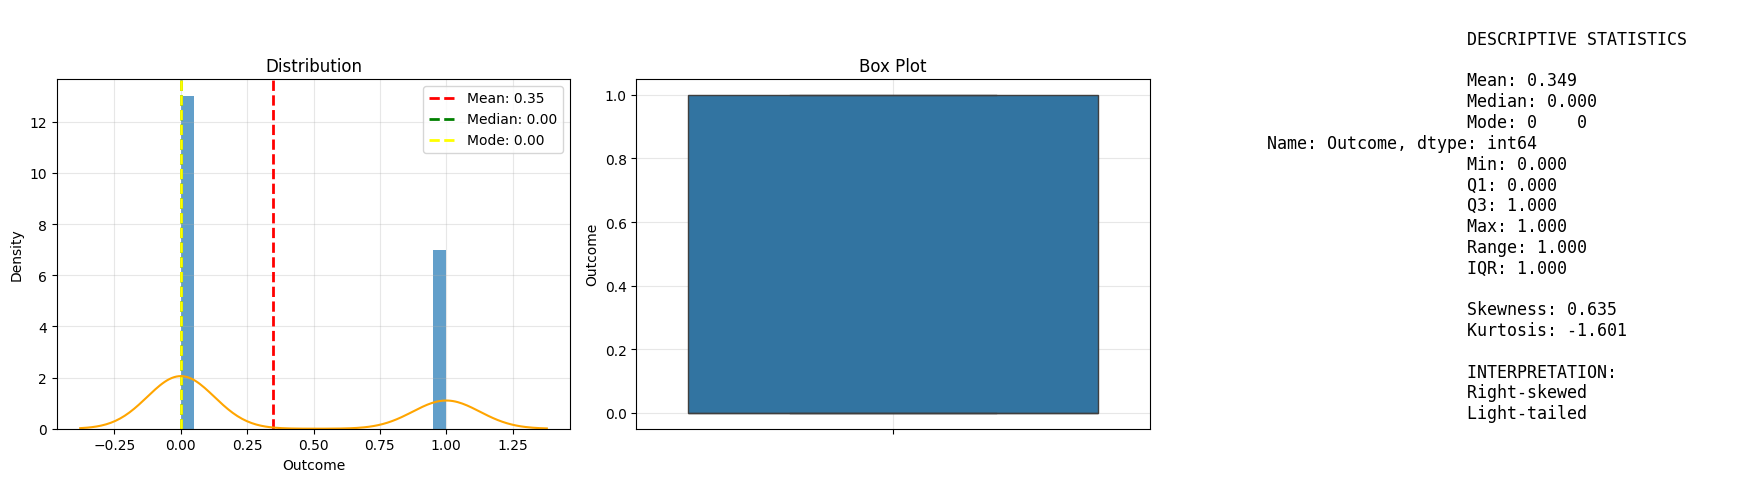

In [198]:
def UA(df):
    for col in df.columns:
        fig,axes=plt.subplots(1,3,figsize=(18,5))
        stats={
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode(),
            'min': df[col].min(),
            'max': df[col].max(),
            'range': df[col].max() - df[col].min(),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurtosis(),
            'Q1':df[col].quantile(0.25),
            'Q3':df[col].quantile(0.75),
            'IQR':df[col].quantile(0.75)- df[col].quantile(0.25),
       
        }
        # print(stats)
        axes[0].hist(x=df[col].dropna(),bins=20,density=True, alpha=0.7)
        axes[0].axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {stats['mean']:.2f}")
        axes[0].axvline(stats['median'], color='green', linestyle='--', linewidth=2, label=f"Median: {stats['median']:.2f}")
        axes[0].axvline(stats['mode'].iloc[0], color='yellow', linestyle='--', linewidth=2, label=f"Mode: {stats['mode'].iloc[0]:.2f}")
        sns.kdeplot(x=df[col].dropna(), ax=axes[0], color='orange')
        axes[0].set_title('Distribution')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Density')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)


        sns.boxplot(y=df[col],ax=axes[1])
        axes[1].set_title('Box Plot')
        axes[1].grid(True, alpha=0.3)

        axes[2].axis('off')
        stats_text = f"""
                    DESCRIPTIVE STATISTICS

                    Mean: {stats['mean']:.3f}
                    Median: {stats['median']:.3f}
                    Mode: {stats['mode']}
                    Min: {stats['min']:.3f}
                    Q1: {stats['Q1']:.3f}
                    Q3: {stats['Q3']:.3f}
                    Max: {stats['max']:.3f}
                    Range: {stats['range']:.3f}
                    IQR: {stats['IQR']:.3f}

                    Skewness: {stats['skewness']:.3f}
                    Kurtosis: {stats['kurtosis']:.3f}

                    INTERPRETATION:
                    {'Right-skewed' if stats['skewness'] > 0.5 else 'Left-skewed' if stats['skewness'] < -0.5 else 'Symmetric'}
                    {'Heavy-tailed' if stats['kurtosis'] > 1 else 'Light-tailed' if stats['kurtosis'] < -1 else 'Normal tails'}
                """
        
        axes[2].text(0.1, 1.2, stats_text, transform=axes[2].transAxes, 
                    fontsize=12, verticalalignment='top', fontfamily='monospace')
        
        plt.tight_layout()
        plt.show()

UA(df) 

#### Intrepretations are in reports folder

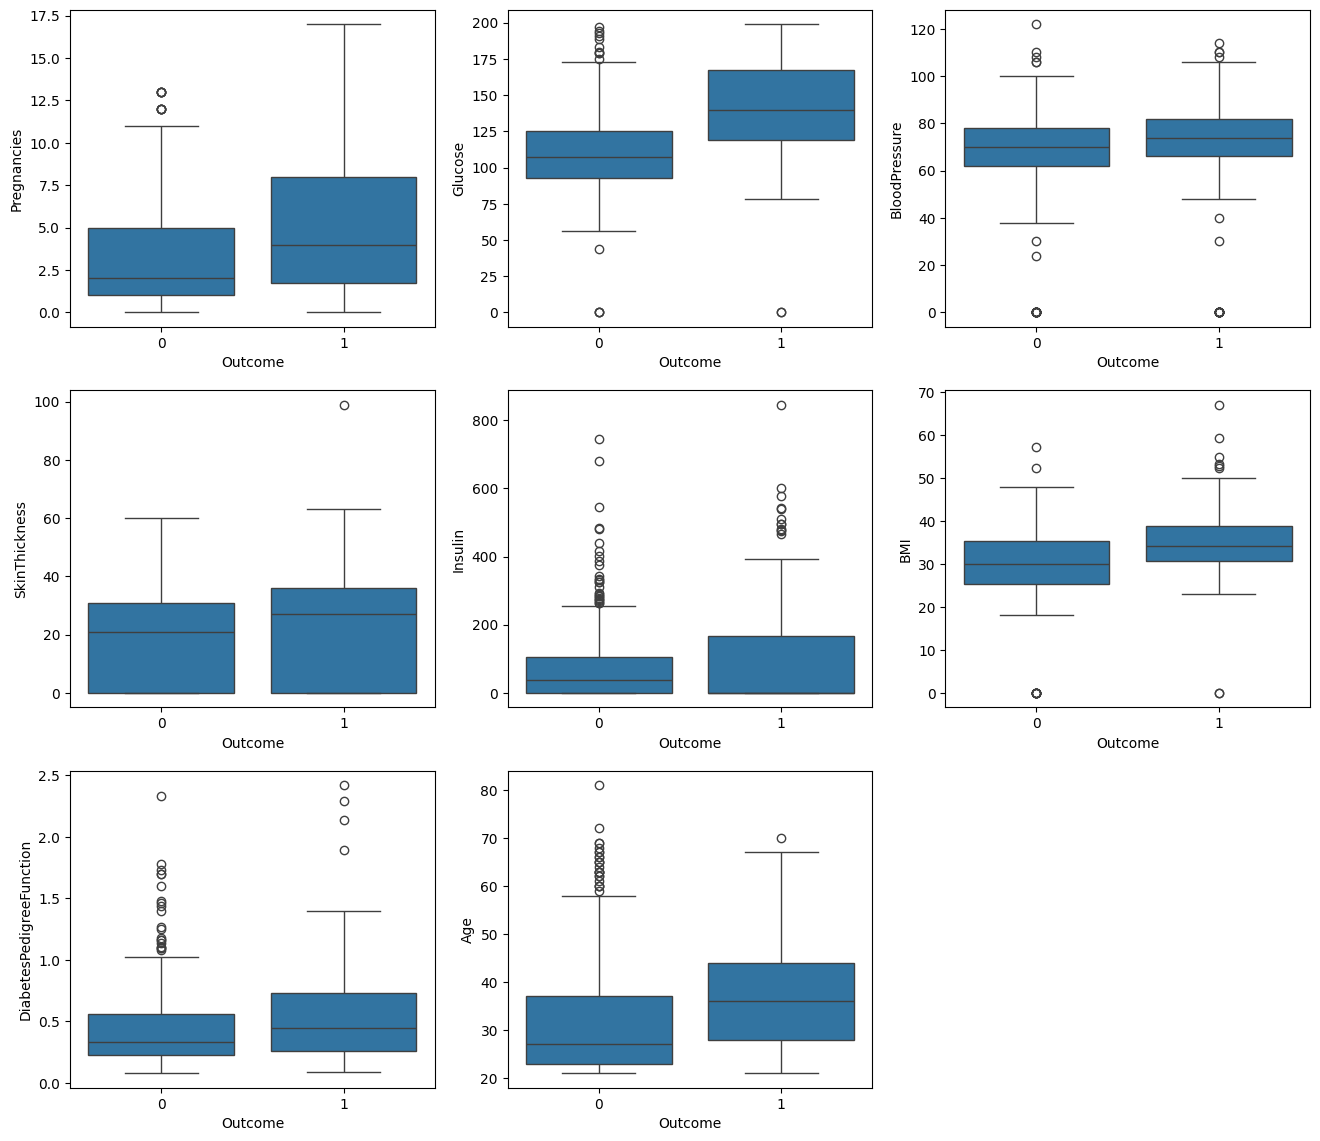

In [199]:
def Bivariate_Analysis(df:pd.DataFrame,target='Outcome'):
    cols=[col for col in df.columns if col!=target]
    rows=(len(cols) + 2) // 3
    fig,axes=plt.subplots(rows, 3,figsize=(16,14))


    # Note:  With flatten(), you convert the 2D array to 1D:
    axes=axes.flatten()

    for i, feature in enumerate(cols):
        # for binary outcome variable, scatter plot is not better , need to go for boxplot/violin plot/ kde, hist split by outcome
        # axes[i].scatter(df[feature],df[target], alpha=0.6, s=50, edgecolor='black')
        # sns.boxplot(x=target,y=feature,data=df,ax=axes[i])
        sns.boxplot(x=target,y=feature,data=df,ax=axes[i])

    for j in range(i+1,len(axes)):
        axes[j].axis('off')

Bivariate_Analysis(df)

# Bivariate Analysis Interpretation: Features vs Diabetes Outcome

Here's how to interpret each box plot (comparing **Outcome 0 = No Diabetes** vs **Outcome 1 = Diabetes**):

---

## Strong Predictors of Diabetes

### Glucose ⭐⭐⭐
- **Separation:** Clear separation between groups  
- **Outcome 0 (No Diabetes):** Median ~110, range 80–140  
- **Outcome 1 (Diabetes):** Median ~140, range 120–170  
- **Interpretation:** People with diabetes have significantly higher glucose levels. This is expected and likely the strongest predictor.

### BMI ⭐⭐
- **Separation:** Moderate separation with overlap  
- **Outcome 0:** Median ~30, range 25–35  
- **Outcome 1:** Median ~35, range 30–40  
- **Interpretation:** Higher BMI is associated with diabetes. Most diabetic patients have BMI >30 (obese range).

### Age ⭐⭐
- **Separation:** Noticeable difference in medians  
- **Outcome 0:** Median ~27, younger population (20–40)  
- **Outcome 1:** Median ~37, older population (30–50)  
- **Interpretation:** Diabetes incidence increases with age, though there's substantial overlap.

### Pregnancies ⭐
- **Separation:** Some separation visible  
- **Outcome 0:** Median ~2, range 1–5  
- **Outcome 1:** Median ~4, range 2–8  
- **Interpretation:** Women with more pregnancies have slightly higher diabetes risk, though overlap is significant.

---

## Moderate/Weak Predictors

### Blood Pressure
- **Separation:** Minimal separation between groups  
- **Observation:** Both groups have similar medians (~70–72); Outcome 1 has slightly higher median and more spread  
- **Interpretation:** Weak association with diabetes in this dataset; not a strong discriminator.

### Insulin
- **Separation:** High overlap, many outliers  
- **Observation:** Both groups concentrated near zero (likely missing/zero values); Outcome 1 slightly higher median  
- **Interpretation:** Data quality issues reduce reliability. In clean data, insulin could be more predictive.

### Skin Thickness
- **Separation:** Substantial overlap  
- **Observation:** Median ~20–30, similar ranges for both groups  
- **Interpretation:** Weak predictor. Little difference between diabetic and non-diabetic groups.

### Diabetes Pedigree Function
- **Separation:** Similar distributions with slight difference  
- **Outcome 0:** Lower median (~0.3–0.4)  
- **Outcome 1:** Slightly higher median (~0.5–0.7)  
- **Interpretation:** Family history shows modest association. Higher genetic risk correlates with diabetes, but overlap is large.

---

## Key Insights

### For Machine Learning
- **Most Important Features:** Glucose, BMI, Age (show clear separation)  
- **Moderately Useful:** Pregnancies, DiabetesPedigreeFunction  
- **Weak Features:** BloodPressure, SkinThickness, Insulin (in current form)  

### Clinical Interpretation
- **Glucose is the gold standard:** Clearest indicator  
- **Lifestyle factors matter:** BMI confirms obesity's role in Type 2 diabetes  
- **Age is a risk factor:** Older individuals at higher risk  
- **Data quality issues:** Zero values in Insulin and SkinThickness reduce predictive power  

---

## What to Look For
- ✅ **Good predictor:** Boxes don't overlap much, medians clearly separated  
- ⚠️ **Moderate predictor:** Some overlap, visible median difference  
- ❌ **Weak predictor:** Heavy overlap, similar medians  

---

## Next Steps
- **Feature engineering:** Consider interactions (e.g., BMI × Age)  
- **Handle missing data:** Address zeros in Insulin and SkinThickness  
- **Feature selection:** Focus on Glucose, BMI, Age as primary features  
- **Correlation analysis:** Check for multicollinearity among predictors


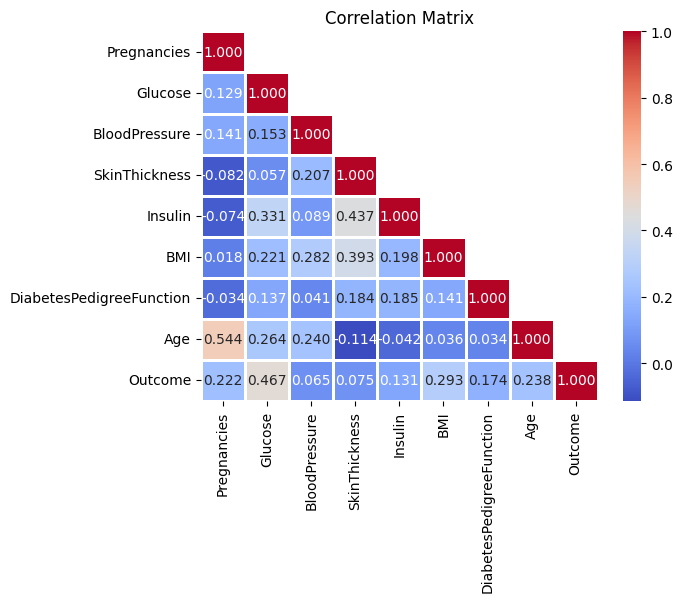

In [200]:
def multivariate_analysis(df):
    corr_matrix=df.corr()
    mask=np.triu(np.ones_like(corr_matrix,dtype=bool),k=1)
    ax=sns.heatmap(corr_matrix, annot=True,mask=mask,fmt='.3f',cmap='coolwarm',linewidths=1)
    ax.set_title("Correlation Matrix")
multivariate_analysis(df)

Observations:
1. Strong correlation, that effects the outcome are:
    - Gulcose, Pregnancies, BMI, Age

2. Weak types
    -  Blood pressure, skin thickness, Insulin, DiabetesPedigreeFunction

    
There can be multicollinearity between age and pregnencies, skinthickness and Insulin, skinthickness and BMI, Glucose and Insulin


#### Data Preprocessing

In [201]:
df.duplicated().any()

False

In [233]:
#If Z-score is >3, it indicates outliers
from scipy import stats
def outliers(df):
    cols=df.columns
    z_score=np.abs(stats.zscore(df[cols]))
    z_outlier=(z_score>3).sum(axis=0)
    z_outlier_mask=(z_score>3).any(axis=1)
    # print(df[z_outlier_mask])

    for col , count in zip(cols,z_outlier):
        pct = (count / len(df)) * 100
        print(f"  {col:20s}: {count:4d} ({pct:5.2f}%)")


outliers(df)

  Pregnancies         :    4 ( 0.52%)
  Glucose             :    5 ( 0.65%)
  BloodPressure       :   35 ( 4.56%)
  SkinThickness       :    1 ( 0.13%)
  Insulin             :   18 ( 2.34%)
  BMI                 :   14 ( 1.82%)
  DiabetesPedigreeFunction:   11 ( 1.43%)
  Age                 :    5 ( 0.65%)
  Outcome             :    0 ( 0.00%)


#### Here, most value have '0' data which is considered as an outlier, which may be the missing value. So, treating them

In [332]:
# filling 0 values 
zero_value_columns=['BloodPressure','SkinThickness','Insulin','BMI','Glucose']
for col in zero_value_columns:
    df[col]=df[col].replace(0,df[col].median())

In [321]:
#If Z-score is >3, it indicates outliers
from scipy import stats
def outliers(df):
    cols=df.columns
    z_score=np.abs(stats.zscore(df[cols]))
    z_outlier=(z_score>3).sum(axis=0)
    z_outlier_mask=(z_score>3).any(axis=1)
    print(df[z_outlier_mask])

    for col , count in zip(cols,z_outlier):
        pct = (count / len(df)) * 100
        print(f"  {col:20s}: {count:4d} ({pct:5.2f}%)")


outliers(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35    168.0  43.1   
8              2      197             70             45    543.0  30.5   
13             1      189             60             23    846.0  30.1   
18             1      103             30             38     83.0  43.3   
43             9      171            110             24    240.0  45.4   
45             0      180             66             39     30.5  42.0   
57             0      100             88             60    110.0  46.8   
58             0      146             82             23     30.5  40.5   
88            15      136             70             32    110.0  37.1   
106            1       96            122             23     30.5  22.4   
111            8      155             62             26    495.0  34.0   
120            0      162             76             56    100.0  53.2   
123            5      132             

#### Here, data which previously looked like an outlier is reduced and handled now 

In [333]:
### handle outliers now,
## cap/ winsorization

def cap(df):
    columns=df.columns
    q1=df[columns].quantile(0.01)
    q3=df[columns].quantile(0.99)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    df[columns]=np.where(df[columns]>upper, upper, df[columns])
    df[columns]=np.where(df[columns]<lower, lower, df[columns])

cap(df)

In [221]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,30.5,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,23.0,30.5,30.1,0.349,47.0,1.0


In [288]:
#If Z-score is >3, it indicates outliers
from scipy import stats
def outliers(df):
    cols=df.columns
    z_score=np.abs(stats.zscore(df[cols]))
    z_outlier=(z_score>3).sum(axis=0)
    z_outlier_mask=(z_score>3).any(axis=1)
    print(df[z_outlier_mask])

    for col , count in zip(cols,z_outlier):
        pct = (count / len(df)) * 100
        print(f"  {col:20s}: {count:4d} ({pct:5.2f}%)")


outliers(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4            0.0    137.0           40.0           35.0    168.0  43.1   
8            2.0    197.0           70.0           45.0    543.0  30.5   
13           1.0    189.0           60.0           23.0    846.0  30.1   
18           1.0    103.0           30.0           38.0     83.0  43.3   
43           9.0    171.0          110.0           24.0    240.0  45.4   
45           0.0    180.0           66.0           39.0     30.5  42.0   
57           0.0    100.0           88.0           60.0    110.0  46.8   
58           0.0    146.0           82.0           23.0     30.5  40.5   
88          15.0    136.0           70.0           32.0    110.0  37.1   
106          1.0     96.0          122.0           23.0     30.5  22.4   
111          8.0    155.0           62.0           26.0    495.0  34.0   
120          0.0    162.0           76.0           56.0    100.0  53.2   
123          5.0    132.0           80

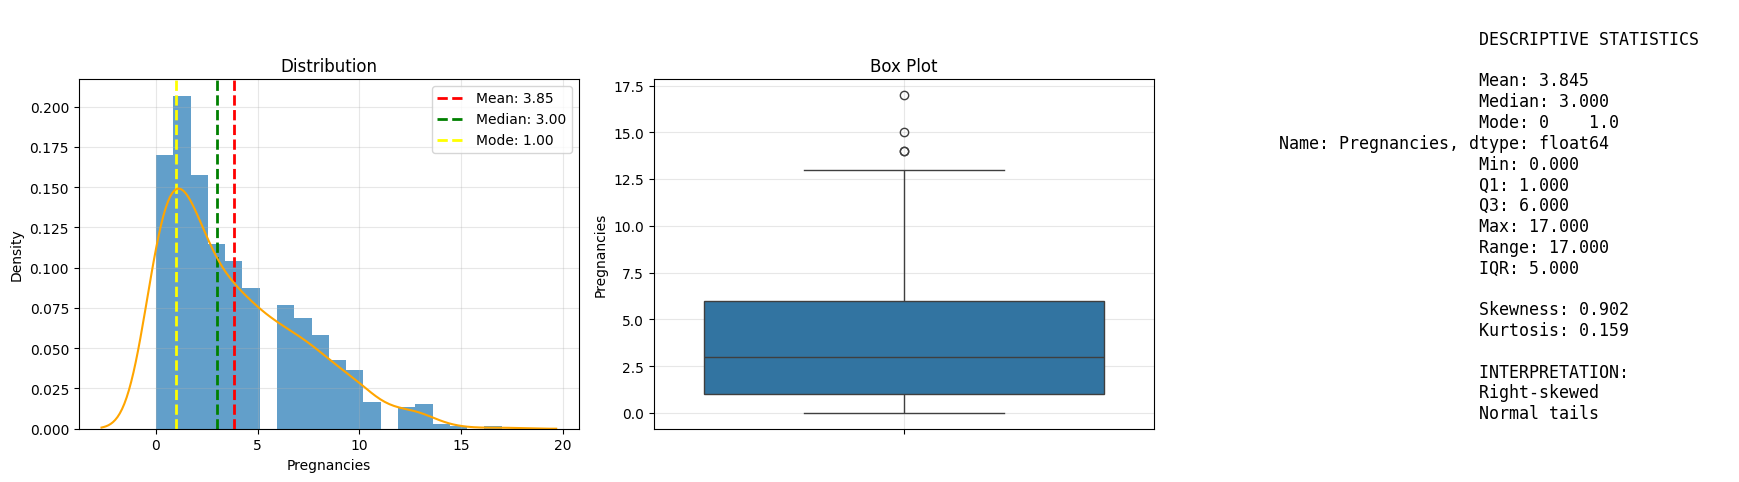

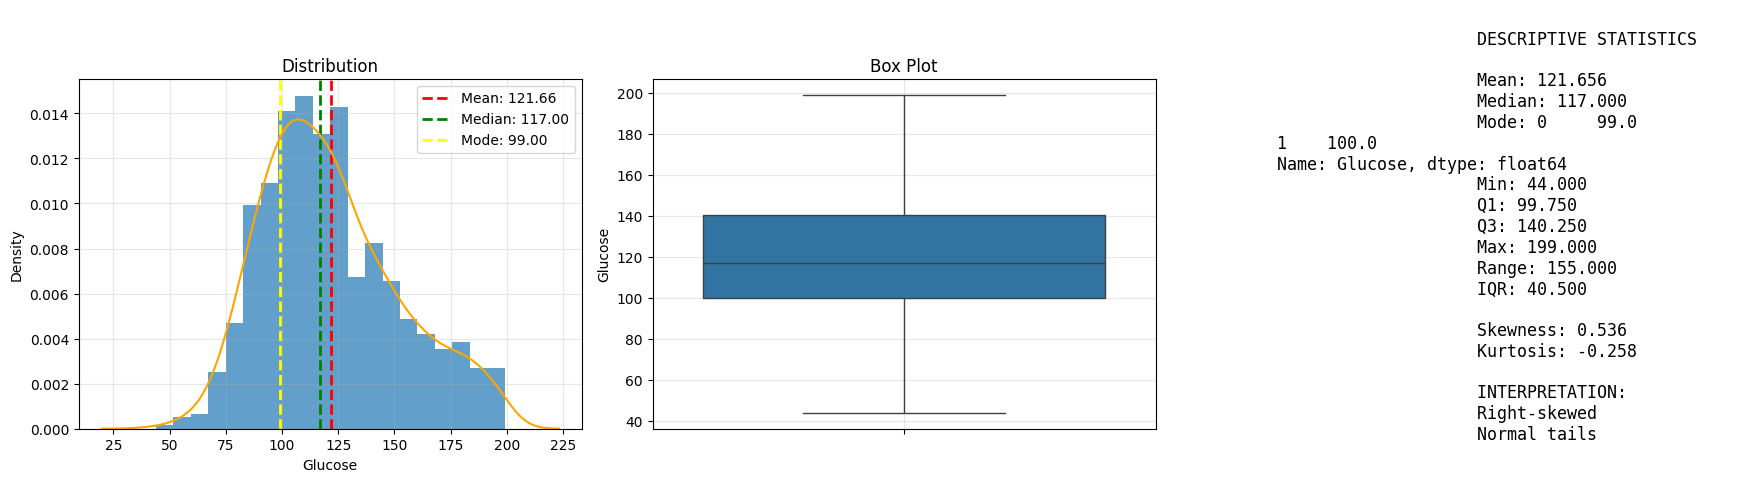

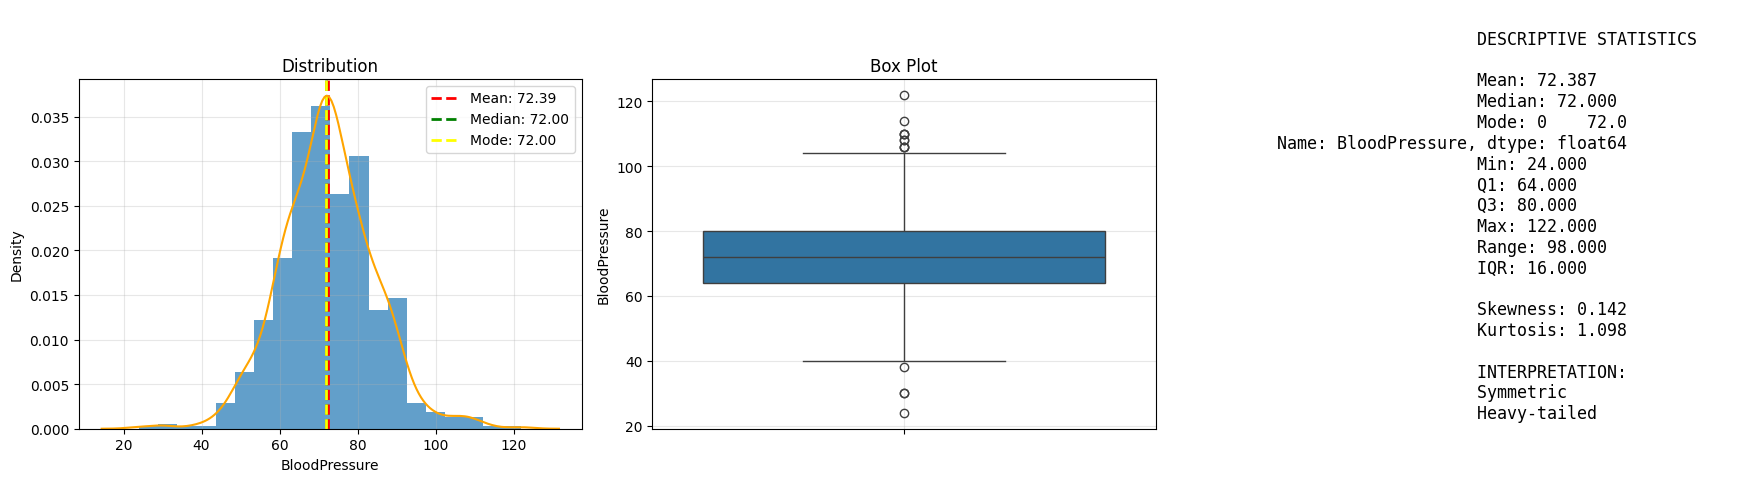

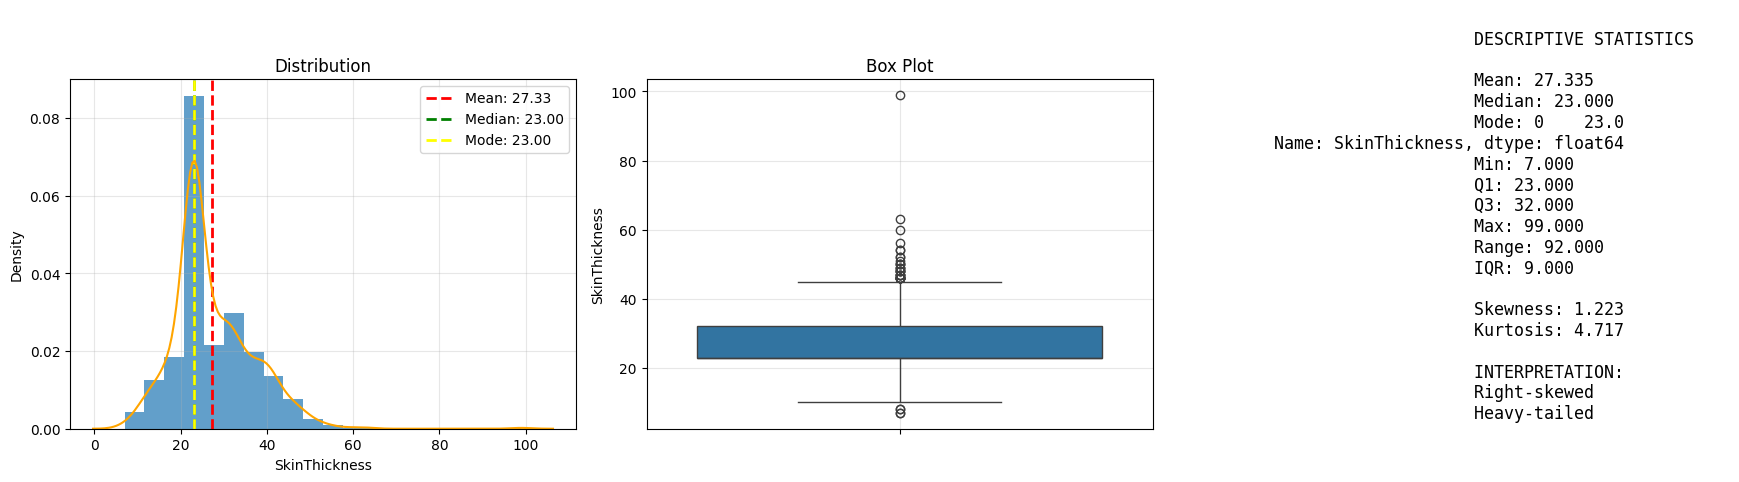

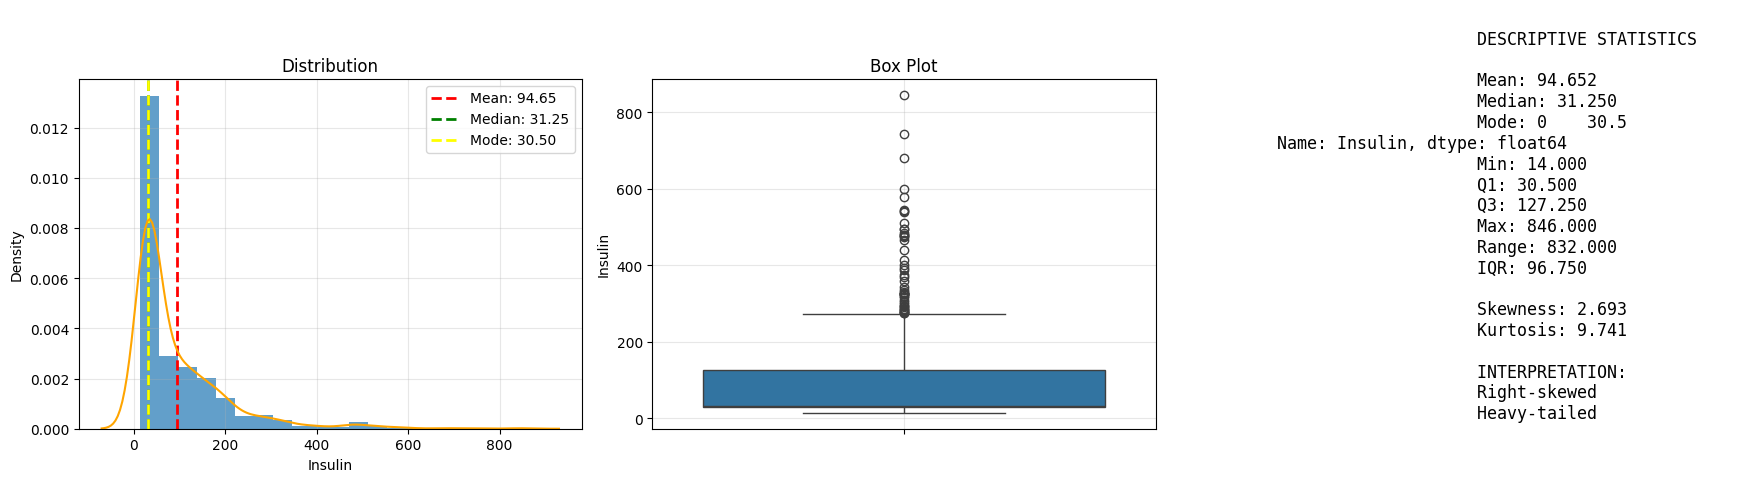

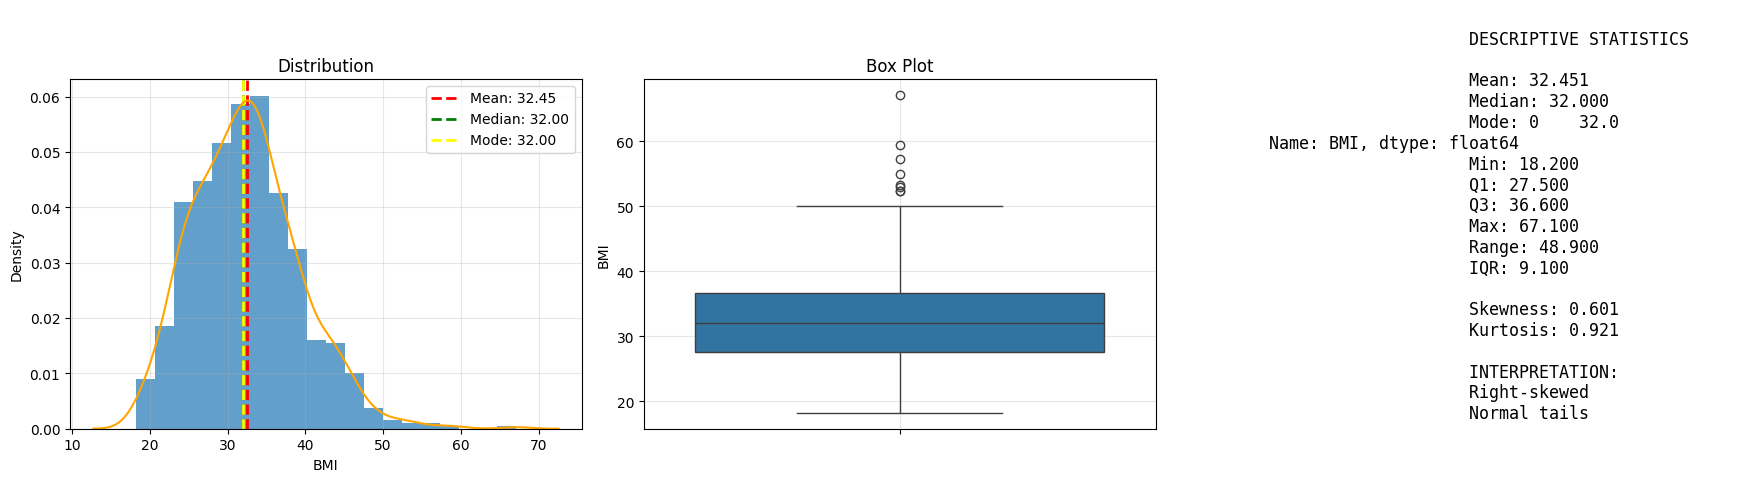

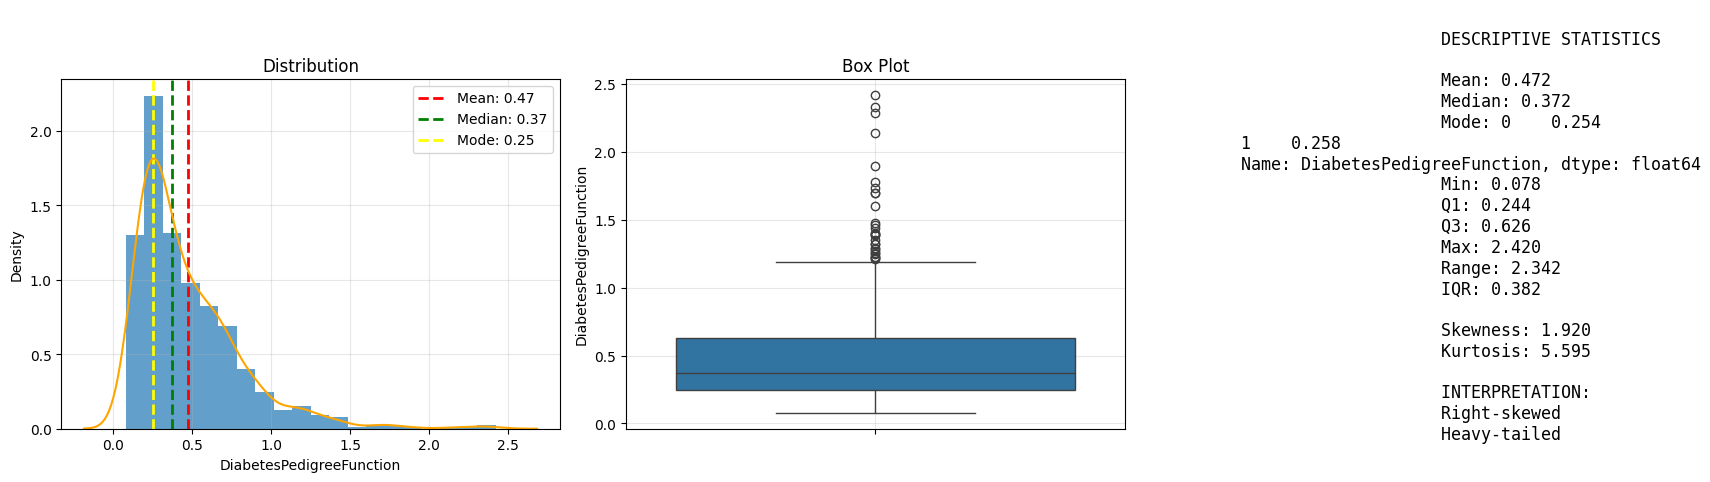

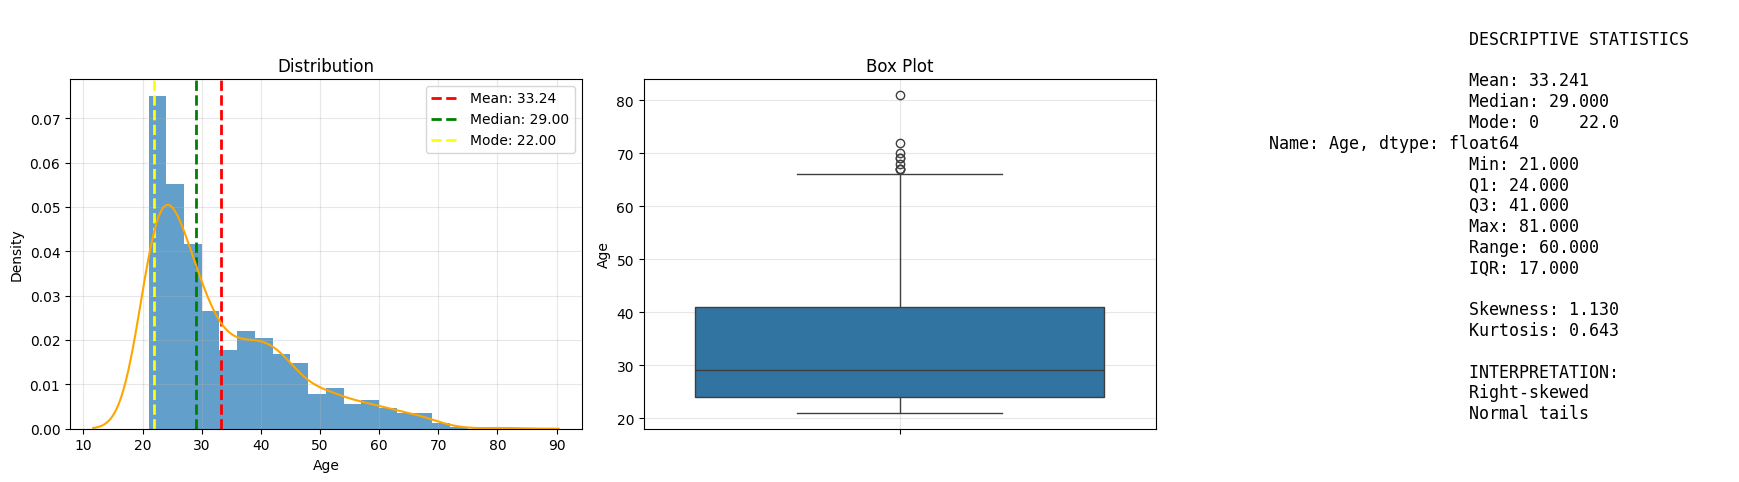

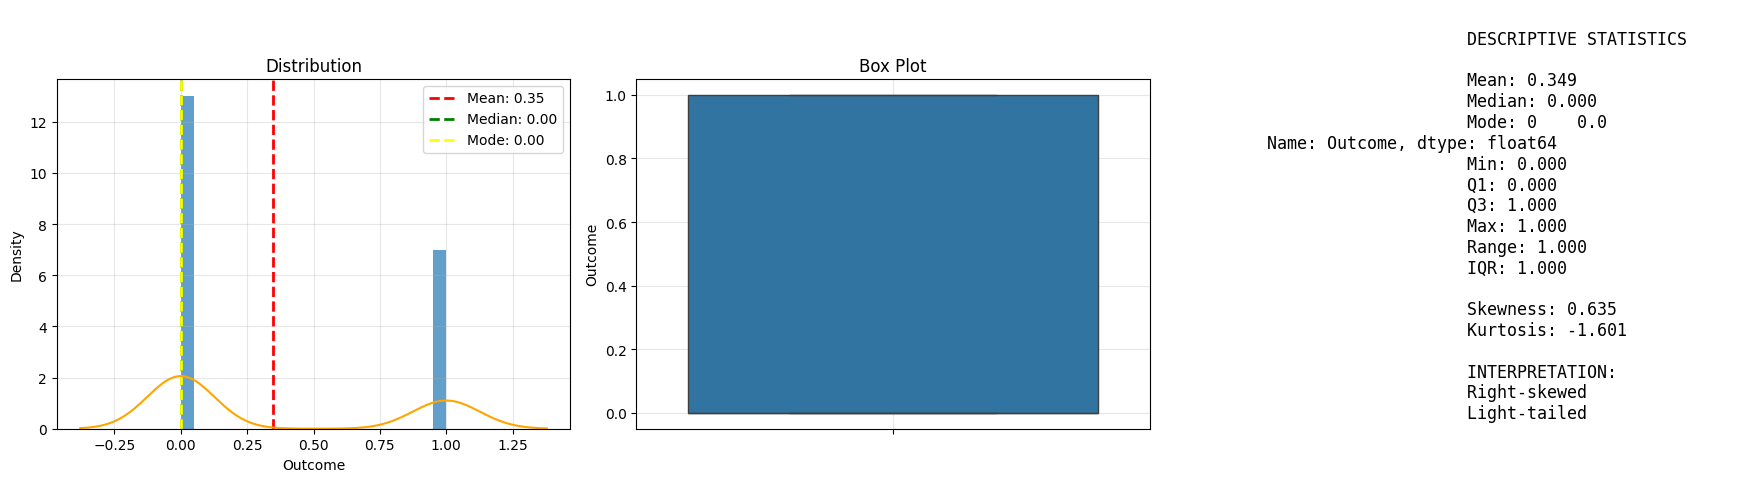

In [289]:
def UA(df):
    for col in df.columns:
        fig,axes=plt.subplots(1,3,figsize=(18,5))
        stats={
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode(),
            'min': df[col].min(),
            'max': df[col].max(),
            'range': df[col].max() - df[col].min(),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurtosis(),
            'Q1':df[col].quantile(0.25),
            'Q3':df[col].quantile(0.75),
            'IQR':df[col].quantile(0.75)- df[col].quantile(0.25),
       
        }
        # print(stats)
        axes[0].hist(x=df[col].dropna(),bins=20,density=True, alpha=0.7)
        axes[0].axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {stats['mean']:.2f}")
        axes[0].axvline(stats['median'], color='green', linestyle='--', linewidth=2, label=f"Median: {stats['median']:.2f}")
        axes[0].axvline(stats['mode'].iloc[0], color='yellow', linestyle='--', linewidth=2, label=f"Mode: {stats['mode'].iloc[0]:.2f}")
        sns.kdeplot(x=df[col].dropna(), ax=axes[0], color='orange')
        axes[0].set_title('Distribution')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Density')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)


        sns.boxplot(y=df[col],ax=axes[1])
        axes[1].set_title('Box Plot')
        axes[1].grid(True, alpha=0.3)

        axes[2].axis('off')
        stats_text = f"""
                    DESCRIPTIVE STATISTICS

                    Mean: {stats['mean']:.3f}
                    Median: {stats['median']:.3f}
                    Mode: {stats['mode']}
                    Min: {stats['min']:.3f}
                    Q1: {stats['Q1']:.3f}
                    Q3: {stats['Q3']:.3f}
                    Max: {stats['max']:.3f}
                    Range: {stats['range']:.3f}
                    IQR: {stats['IQR']:.3f}

                    Skewness: {stats['skewness']:.3f}
                    Kurtosis: {stats['kurtosis']:.3f}

                    INTERPRETATION:
                    {'Right-skewed' if stats['skewness'] > 0.5 else 'Left-skewed' if stats['skewness'] < -0.5 else 'Symmetric'}
                    {'Heavy-tailed' if stats['kurtosis'] > 1 else 'Light-tailed' if stats['kurtosis'] < -1 else 'Normal tails'}
                """
        
        axes[2].text(0.1, 1.2, stats_text, transform=axes[2].transAxes, 
                    fontsize=12, verticalalignment='top', fontfamily='monospace')
        
        plt.tight_layout()
        plt.show()

UA(df) 

In [334]:
features = [col for col in df.columns if col != 'Outcome']
X = df[features]
y = df['Outcome']

#### Transformation for high skewness which is >2
 - If skewness > 2 → Transform.
 - If outliers exist → Use RobustScaler.
 - If using tree models → Ignore transformation & scaling entirely.


Let's do transformation for below mentioned columns:
1. Insulin

In [336]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
def transform(df,features):
    if 'Insulin' in df.columns:
        log_transformer = ColumnTransformer(
        transformers=[
            ("log_transform", FunctionTransformer(np.log1p), ['Insulin'])
        ],
        remainder='passthrough'
                )
        transformed_array=log_transformer.fit_transform(df[features])
        transformed_columns=['Insulin'] + [col for col in features if col!='Insulin']
        df_transformed=pd.DataFrame(transformed_array,columns=transformed_columns)
        return df_transformed,log_transformer
    else:
        return df.copy(),None
    

X_transformed_df,log_transformer=transform(X,features)

In [337]:
X_transformed_df

,Insulin,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,3.449988,6.0,148.0,72.0,35.0,33.6,0.627,50.0
1,3.449988,1.0,85.0,66.0,29.0,26.6,0.351,31.0
2,3.449988,8.0,183.0,64.0,23.0,23.3,0.672,32.0
3,4.553877,1.0,89.0,66.0,23.0,28.1,0.167,21.0
4,5.129899,0.0,137.0,40.0,35.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,5.198497,10.0,101.0,76.0,48.0,32.9,0.171,63.0
764,3.449988,2.0,122.0,70.0,27.0,36.8,0.340,27.0
765,4.727388,5.0,121.0,72.0,23.0,26.2,0.245,30.0
766,3.449988,1.0,126.0,60.0,23.0,30.1,0.349,47.0


In [338]:
def scale(transformed_df):
    all_features = [col for col in transformed_df.columns if col != 'Outcome']

    scaler = RobustScaler()
    scaled_array = scaler.fit_transform(transformed_df[all_features])

    # Keep Outcome separately
    final_df = pd.DataFrame(scaled_array, columns=all_features)
    if 'Outcome' in transformed_df.columns:
        final_df['Outcome'] = transformed_df['Outcome'].values

    return final_df, scaler

# Usage
X_final, x_scaler = scale(X_transformed_df)


In [339]:
X_final

,Insulin,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,-0.016567,0.6,0.765432,0.000,1.333333,0.175824,0.665359,1.235294
1,-0.016567,-0.4,-0.790123,-0.375,0.666667,-0.593407,-0.056209,0.117647
2,-0.016567,1.0,1.629630,-0.500,0.000000,-0.956044,0.783007,0.176471
3,0.769685,-0.4,-0.691358,-0.375,0.000000,-0.428571,-0.537255,-0.470588
4,1.179961,-0.6,0.493827,-2.000,1.333333,1.219780,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.228820,1.4,-0.395062,0.250,2.777778,0.098901,-0.526797,2.000000
764,-0.016567,-0.2,0.123457,-0.125,0.444444,0.527473,-0.084967,-0.117647
765,0.893270,0.4,0.098765,0.000,0.000000,-0.637363,-0.333333,0.058824
766,-0.016567,-0.4,0.222222,-0.750,0.000000,-0.208791,-0.061438,1.058824


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import RobustScaler, FunctionTransformer
# import numpy as np
# import pandas as pd

# def transform(df):
#     transformers = []

#     # log1p transform for Insulin (if present)
#     if "Insulin" in df.columns:
#         transformers.append(
#             ("log_insulin", FunctionTransformer(np.log1p), ["Insulin"])
#         )
    
#     # robust scaling for all numeric features except Outcome
#     numeric_cols = [col for col in df.columns if col != "Outcome"]
#     transformers.append(
#         ("robust_scaling", RobustScaler(), numeric_cols)
#     )

#     ct = ColumnTransformer(
#         transformers=transformers,
#         remainder="passthrough"
#     )

#     # Transform
#     transformed = ct.fit_transform(df)

#     # Convert back to DataFrame with correct column names
#     new_cols = (
#         ["Insulin_log1p"] if "Insulin" in df.columns else []  # name for log column
#         + numeric_cols                                       # robust scaled columns
#         + ["Outcome"]                                        # passthrough column
#     )

#     return pd.DataFrame(transformed, columns=new_cols)


In [340]:
### split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2, random_state=42)

#### LogisticRegression

In [341]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [342]:
y_pred=lr.predict(X_test)

In [343]:
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report,roc_auc_score

print(" Accuray",accuracy_score(y_test,y_pred))
print(" Confusion matric",confusion_matrix(y_test,y_pred))
print(" Classification Report",classification_report(y_test,y_pred))
print(" ROC_AUC Score",roc_auc_score(y_test,y_pred))


 Accuray 0.7727272727272727
 Confusion matric [[83 16]
 [19 36]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.81      0.84      0.83        99
         1.0       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

 ROC_AUC Score 0.7464646464646464


#### Let's try other models

#### naive_bayes

In [344]:
def result(y_pred):
    from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report,roc_auc_score

    print(" Accuray",accuracy_score(y_test,y_pred))
    print(" Confusion matric",confusion_matrix(y_test,y_pred))
    print(" Classification Report",classification_report(y_test,y_pred))
    print(" ROC_AUC Score",roc_auc_score(y_test,y_pred))


In [345]:
from sklearn.naive_bayes import GaussianNB

guassian_nb=GaussianNB()
guassian_nb.fit(X_train,y_train)

GaussianNB()

In [346]:
gnb_y_pred=guassian_nb.predict(X_test)

In [347]:
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report,roc_auc_score

print(" Accuray",accuracy_score(y_test,gnb_y_pred))
print(" Confusion matric",confusion_matrix(y_test,gnb_y_pred))
print(" Classification Report",classification_report(y_test,gnb_y_pred))
print(" ROC_AUC Score",roc_auc_score(y_test,gnb_y_pred))


 Accuray 0.7467532467532467
 Confusion matric [[78 21]
 [18 37]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        99
         1.0       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

 ROC_AUC Score 0.7303030303030302


#### KNeighborsClassifier

In [348]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(algorithm='brute',n_jobs=-1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [349]:
knn_y_pred=knn.predict(X_test)

In [350]:
result(knn_y_pred)

 Accuray 0.6883116883116883
 Confusion matric [[76 23]
 [25 30]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.75      0.77      0.76        99
         1.0       0.57      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

 ROC_AUC Score 0.6565656565656566


#### SVM

In [351]:
from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(X_train,y_train)

LinearSVC()

In [352]:
svm_y_pred=svm.predict(X_test)

In [353]:
result(svm_y_pred)

 Accuray 0.7792207792207793
 Confusion matric [[84 15]
 [19 36]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83        99
         1.0       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

 ROC_AUC Score 0.7515151515151515


### Decision Tree

In [354]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(min_samples_split=10,max_depth=3)
dt.fit(X_train,y_train)
dt_y_pred=dt.predict(X_test)
result(dt_y_pred)

 Accuray 0.7597402597402597
 Confusion matric [[83 16]
 [21 34]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        99
         1.0       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

 ROC_AUC Score 0.7282828282828282


#### RandomForestClassifier

In [355]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300,max_depth=3)
rf.fit(X_train, y_train)
rf_y_pred=rf.predict(X_test)
result(rf_y_pred)

 Accuray 0.7857142857142857
 Confusion matric [[89 10]
 [23 32]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

 ROC_AUC Score 0.7404040404040404


In [274]:
pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [356]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
xgb.fit(X_train, y_train, verbose=False)
xgb_y_pred=xgb.predict(X_test)
result(xgb_y_pred)

 Accuray 0.7207792207792207
 Confusion matric [[75 24]
 [19 36]]
 Classification Report               precision    recall  f1-score   support

         0.0       0.80      0.76      0.78        99
         1.0       0.60      0.65      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

 ROC_AUC Score 0.706060606060606


#### saving model

In [357]:
import joblib
joblib.dump(guassian_nb,'diabetes_naive_bayes.pkl')

['diabetes_naive_bayes.pkl']

In [358]:
joblib.dump(lr, "diabetes_logistic_regression.pkl")

['diabetes_logistic_regression.pkl']

In [359]:
joblib.dump(log_transformer, "log_transformer.pkl")

['log_transformer.pkl']

In [360]:
joblib.dump(x_scaler, "scaler.pkl")

['scaler.pkl']

In [361]:
import joblib

# Load the saved model
nb_model = joblib.load("diabetes_naive_bayes.pkl")
lr_model = joblib.load("diabetes_logistic_regression.pkl")
log_transformer_model = joblib.load("log_transformer.pkl")
scaler_model = joblib.load("scaler.pkl")

In [362]:
# Example new data
import pandas as pd

new_data = pd.DataFrame({
    'Pregnancies': [2, 0],
    'Glucose': [120, 85],
    'BloodPressure': [70, 60],
    'SkinThickness': [20, 25],
    'Insulin': [79, 85],
    'BMI': [28.5, 22.0],
    'DiabetesPedigreeFunction': [0.5, 0.3],
    'Age': [33, 29]
})


In [363]:
transformed_new=log_transformer_model.transform(new_data)
transformed_columns = ['Insulin'] + [col for col in new_data.columns if col != 'Insulin']
transformed_new_df = pd.DataFrame(transformed_new, columns=transformed_columns)

In [364]:
X_new_scaled=scaler_model.transform(transformed_new_df)
x_new_final=pd.DataFrame(X_new_scaled,columns=transformed_columns)

In [365]:
# Predict
prob = nb_model.predict_proba(x_new_final)[:,1]
pred = (prob >= 0.5).astype(int)
status = ['Diabetic' if p==1 else 'Non-diabetic' for p in pred]

print(status, prob)

['Non-diabetic', 'Non-diabetic'] [0.0627556 0.0074525]
